<a href="https://colab.research.google.com/github/HelloJinny/Naver-Movie-Review/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 영화 리뷰 데이터 분석

## 영화 정보 크롤링

#### 리뷰 정보 클래스 작성

In [47]:
import urllib.request
from bs4 import BeautifulSoup

In [48]:
class Review:
    def __init__(self, comment, date, star, good, bad):
        self.comment = comment
        self.date = date
        self.star = star
        self.good = good
        self.bad = bad

    def show(self):
        print("내용: " + self.comment +
              "\n날짜: " + self.date+
              "\n별점: " + self.star +
              "\n좋아요: " + self.good +
              "\n싫어요: " + self.bad)


#### 리뷰 정보 크롤링 함수

In [49]:
def crawl(url):
    soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
    review_list = []
    title = soup.find('h3', class_='h_movie').find('a').text
    div = soup.find("div", class_="score_result")
    data_list = div.select("ul > li")
    
    for review in data_list:
        star = review.find("div", class_="star_score").text.strip()
        reply = review.find("div", class_="score_reple")
        comment = reply.find("p").text.strip()
        date = reply.select("dt > em")[1].text.strip()
        button = review.find("div", class_="btn_area")
        sympathy = button.select("strong")
        good = sympathy[0].text
        bad = sympathy[1].text
        review_list.append(Review(comment, date, star, good, bad))
    
    return title, review_list

#### 리뷰 정보 크롤링

In [50]:
title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=189141")
print('제목: ' + title)
for review in review_list:
    review.show()

제목: 삼진그룹 영어토익반
내용: 어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대이상이었습니다~
날짜: 2020.10.21 13:53
별점: 10
좋아요: 997
싫어요: 211
내용: 2020년 본 영화중에 가장 기분 좋게 본 영화같아요
날짜: 2020.10.21 15:43
별점: 10
좋아요: 824
싫어요: 160
내용: 근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ
날짜: 2020.10.21 15:36
별점: 10
좋아요: 798
싫어요: 175
내용: 억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ
날짜: 2020.10.21 15:44
별점: 10
좋아요: 699
싫어요: 145
내용: 정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ
날짜: 2020.10.21 13:52
별점: 10
좋아요: 622
싫어요: 144


---
---
---
---
---

## 2. 데이터 시각화


#### 데이터 프레임화

In [51]:
import pandas as pd

In [52]:
def get_summary(review_list):
    star_list = []
    good_list = []
    bad_list = []
    
    for review in review_list:
        star_list.append(int(review.star))
        good_list.append(int(review.good))
        bad_list.append(int(review.bad))
        
    star_series = pd.Series(star_list)
    good_series = pd.Series(good_list)
    bad_series = pd.Series(bad_list)
    
    summary = pd.DataFrame({
        'Star': star_series,
        'Good': good_series,
        'Bad': bad_series,
        'Score': good_series / (good_series + bad_series)
    })
    
    return summary

#### 다수의 영화 데이터 시각화 1

In [53]:
movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
    title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
    summary = get_summary(review_list)
    print("[ %s ]" % (title))
    print(summary)
    review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  23667  662  0.972790
1    10  15673  442  0.972572
2    10  15280  473  0.969974
3    10  13509  552  0.960742
4    10  11839  434  0.964638
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1956  105  0.949054
1    10   983   85  0.920412
2    10   846   73  0.920566
3     8   955  283  0.771405
4     8   630   43  0.936107
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    75    5  0.937500
1    10    45    3  0.937500
2    10    35    4  0.897436
3    10    32    2  0.941176
4     6    53   24  0.688312
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    28   11  0.717949
1    10    26   11  0.702703
2    10    23   10  0.696970
3    10    18    6  0.750000
4    10    21    9  0.700000
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    84   12  0.875000
1    10    45    5  0.900000
2    10    46    7  0.867925
3     8    38    6  0.863636
4     8    28    0  1.000000


#### 다수의 영화 데이터 시각화 2

In [54]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

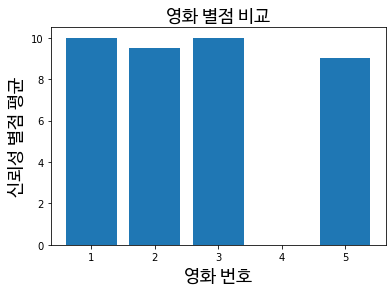

In [56]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []

  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8]
    y.append(summary['Star'].mean())
    count += 1
    
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
  
movie_compare(review_lists)